In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def test(u, v):
    P = (1/(u + v))* np.array([[v + u* np.exp(-(u+v)), u - u* np.exp(-(u+v))], [v - v* np.exp(-(u+v)), u + v* np.exp(-(u+v))] ])
    return(P)

In [3]:
P = test(1,1); P

array([[0.56766764, 0.43233236],
       [0.43233236, 0.56766764]])

In [4]:
## check using Yang derivation on page 39 where a =b = 1 and P[0,0] equals (1/2) + (1/2)e^-2t , here assuming that t = 1
.5+.5*math.exp(-2) #same result!

0.5676676416183064

In [5]:
#ennumerating all the ancestral nodes where 0 = A and 1 = B
root_states = [0,1]
first_internal_state = [0,1]
second_internal_state= [0,1]


In [6]:
def likelihood(u, v):
    final_list = []
#     u = mig_uv
#     v = mig_vu
    #print(u)
    #print(v)
    D = {'root': [], 'first': [], 'second': [], 'likelihood':[]}
    total = 0
    root_freq = [(v /(u+v)),(u /(u+v)) ]
    P = (1/(u + v))* np.array([[v + u* np.exp(-(u+v)), u - u* np.exp(-(u+v))], [v - v* np.exp(-(u+v)), u + v* np.exp(-(u+v))] ])
    #print(root_freq[0])
    #print(P)
    #print(root_freq[0])
    #print(P[0,1])
    total_list = []
    for root in root_states:
        for first_internal in first_internal_state:
            for second_internal in second_internal_state:
                total = 0
                total = root_freq[root]*P[root,1]*P[root, first_internal]*P[first_internal, 1]*P[first_internal, second_internal]*P[second_internal, 1]*P[second_internal, 0]
                total_list.append(total)
                D['root'].append(root)
                D['first'].append(first_internal)
                D['second'].append(second_internal)
                D['likelihood'].append(total)
    return np.sum(total_list), D

In [7]:
test , dict_d = likelihood( .4, .1); test

0.059367993736735944

In [ ]:
foo = pd.DataFrame(dict_d);foo

In [ ]:
foo.likelihood.sum()

In [ ]:
root_states

In [8]:
mig_ab = np.arange(0.001, 5, 0.01)
mig_ba = np.arange(0.001, 5, 0.01)

In [9]:
#cycle through values of v and u and create a giant dataframe for each combination

x = mig_ab
y = mig_ba
total_list= []
D = {'A_B': [], 'B_A': [], 'posterior': []}
for a in x:
    for b in y:
        total, dict_d = likelihood(a, b)
        posteior = total* np.exp(-a)* np.exp(-b) #assuming the prior is that both mig rates follow exp dist with mean 1
        total_list.append(posteior)
        D['A_B'].append(a)
        D['B_A'].append(b)
        D['posterior'].append(posteior)



In [10]:
df = pd.DataFrame(D); df

,A_B,B_A,posterior
0,0.001,0.001,0.000497
1,0.001,0.011,0.000853
2,0.001,0.021,0.000832
3,0.001,0.031,0.000792
4,0.001,0.041,0.000748
...,...,...,...
249995,4.991,4.951,0.000003
249996,4.991,4.961,0.000003
249997,4.991,4.971,0.000003
249998,4.991,4.981,0.000003


In [11]:
df[df.posterior == df.posterior.max()]

,A_B,B_A,posterior
20516,0.411,0.161,0.03914


In [12]:
#df.to_csv("~/Desktop/test_likelihood.csv")

In [13]:
np.random.exponential(scale=1.0)

1.1713613368035591

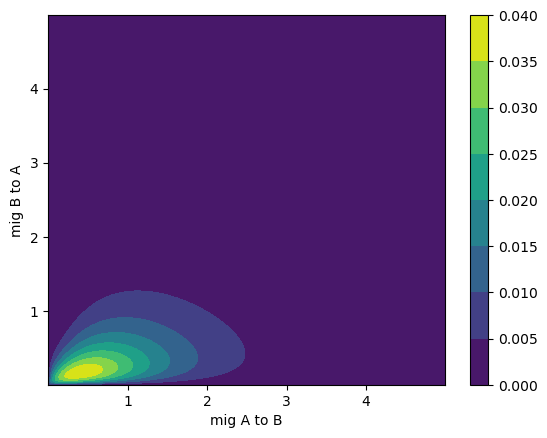

In [15]:
x=df.A_B
y=df.B_A
z=df.posterior
fig, ax = plt.subplots()
tcf = ax.tricontourf(x, y, z)
fig.colorbar(tcf)
ax.tricontourf(x, y, z)
ax.set_xlabel("mig A to B")
ax.set_ylabel("mig B to A")
plt.savefig('posterior_question_3.png',dpi=300,bbox_inches='tight')



In [ ]:
x=df.A_B
y=df.B_A
z=df.posterior
fig, ax = plt.subplots()
tcf = ax.tricontourf(x, y, z)
fig.colorbar(tcf)
ax.tricontourf(x, y, z)
ax.set_xlabel("mig A to B")
ax.set_ylabel("mig B to A")
plt.ylim((0,2))
plt.xlim((0,2))
